# <span style="color:gray"> Exemplo 1: Ajustando uma linha reta </span>

In [13]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
#import os,sys
#Configurando figura e o rc parameters
%config InlineBackend.figure_format='retina'
plt.rcParams["figure.figsize"] = (15,5)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

<span style="color:gray">Suponha que $N$ medidas de temperatura são feitas em $T_{i}$ momentos diferentes, na atmosfera  </span>

In [14]:
%%time
np.random.seed(20)# fixa o gerador de números aleatórios
d= np.cumsum(np.random.randn(92,1))# vetor anomalia de temperatura (dado) #np.random.choice(np.arange(-0.5,1.2,0.2), 92)# vetor anomalia de temperatura em uma faixa específica de temperatura
t= np.arange(1965,2011,0.5)# vetor tempo (número de medições)
print(t)
print("Ranks=",np.size(d),"e",np.size(t))

[1965.  1965.5 1966.  1966.5 1967.  1967.5 1968.  1968.5 1969.  1969.5
 1970.  1970.5 1971.  1971.5 1972.  1972.5 1973.  1973.5 1974.  1974.5
 1975.  1975.5 1976.  1976.5 1977.  1977.5 1978.  1978.5 1979.  1979.5
 1980.  1980.5 1981.  1981.5 1982.  1982.5 1983.  1983.5 1984.  1984.5
 1985.  1985.5 1986.  1986.5 1987.  1987.5 1988.  1988.5 1989.  1989.5
 1990.  1990.5 1991.  1991.5 1992.  1992.5 1993.  1993.5 1994.  1994.5
 1995.  1995.5 1996.  1996.5 1997.  1997.5 1998.  1998.5 1999.  1999.5
 2000.  2000.5 2001.  2001.5 2002.  2002.5 2003.  2003.5 2004.  2004.5
 2005.  2005.5 2006.  2006.5 2007.  2007.5 2008.  2008.5 2009.  2009.5
 2010.  2010.5]
Ranks= 92 e 92
CPU times: user 2.16 ms, sys: 179 µs, total: 2.34 ms
Wall time: 1.91 ms


<span style="color:gray">, conforme a figura abaixo.</span>

CPU times: user 24.5 ms, sys: 324 µs, total: 24.8 ms
Wall time: 20.6 ms


Text(0, 0.5, 'Anomalia de temperatura, Ti (Graus Celcius)')

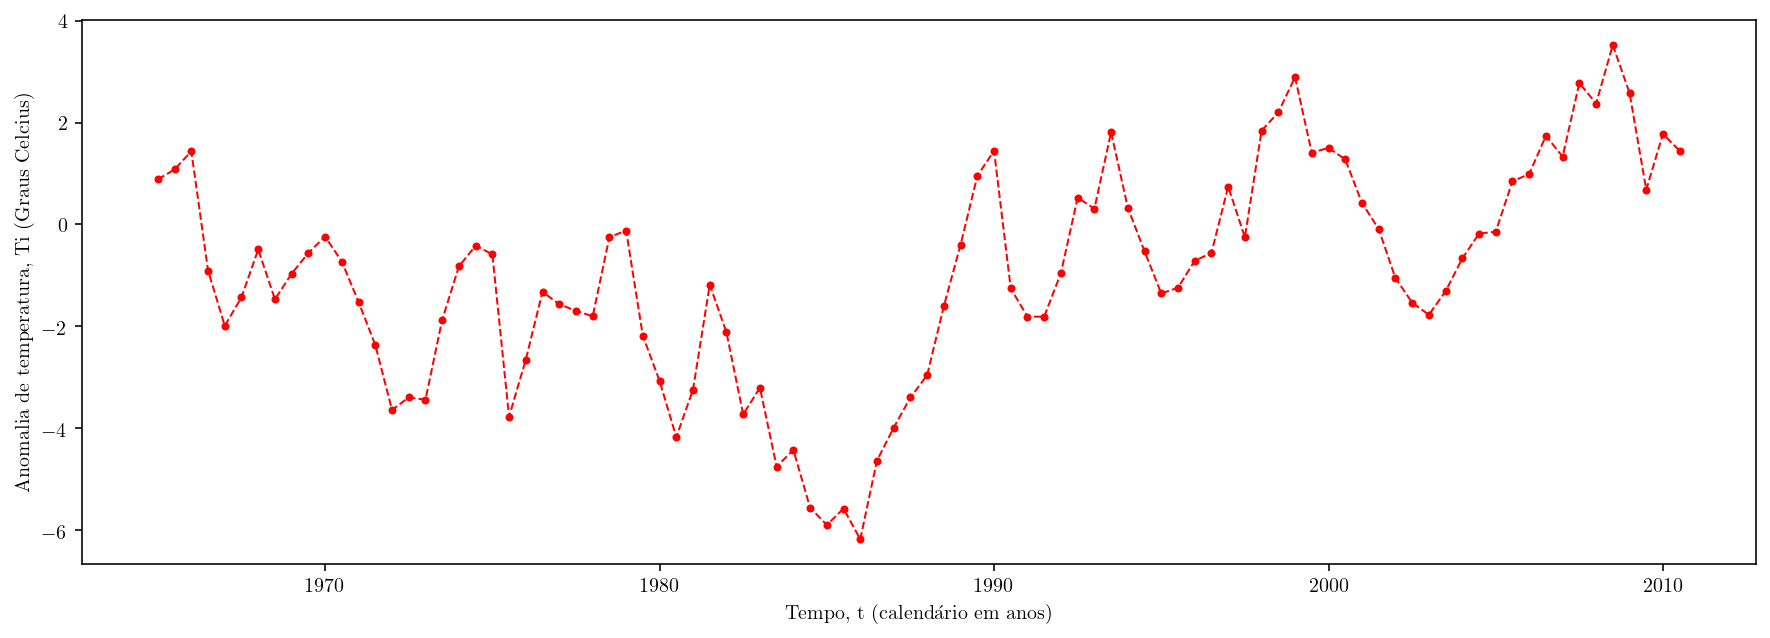

In [15]:
%%time
plt.plot(t,d,color='red', marker='o', linestyle='dashed', linewidth=1, markersize=3)
plt.xlabel('Tempo, t (calendário em anos)')  
plt.ylabel('Anomalia de temperatura, Ti (Graus Celcius)')

O dado é representado pelo vetor \textbf{d} com $N$ medidas de temperatura, onde 


\begin{equation}\label{eq:dado}
\vec{d}  = [T_{1},T_{2},T_{3},\dots,T_{n}].
\end{equation}


O tempo ou a variável \textbf{t} não é necessariamente um dado físico, mas trás consigo informações sobre a geometria do problema.

Supondo que nós assumimos um modelo no qual a temperatura é uma função linear do tipo $ T = a + bt $. O coeficiente angular $a$ e o coeficiente linear $b$ formam os dois modelos de parâmetros do problema, $\textbf{m}=[a,b]^{T}$. E de acordo com este modelo, cada observação de temperatura deve satisfazer $T_{i}=a+bt_{i}$. Ou seja, $$T_{1}=a+bt_{1} \\ T_{2}=a+bt_{2} \\ T_{3}=a+bt_{3} \\ \vdots \\ T_{N}=a+bt_{N}$$

Essas equações podem ser reescritas na forma matricial como $\textbf{d}=\textbf{G}\textbf{m}$

$$ 
\begin{bmatrix} 
T_{1} \\
T_{2} \\
\vdots \\
T_{N}  \\
\end{bmatrix}
\quad
=
\quad
\begin{bmatrix} 
1      & t_{1} \\
1      & t_{2} \\
\vdots & \vdots \\
1      & t_{N}  \\
\end{bmatrix}
\quad
\begin{bmatrix} 
a \\
b \\
\end{bmatrix}
$$

Onde $\textbf{G}$ é a matriz kernel, matriz sensibilidade ou matriz Jacobiana. O problema é bem posto porque o rank da matriz é igual ao número de parâmetros do problema. Matriz G é composta de vetores linearmente independentes. Valores das colunas da matriz sensibilidade devem ser diferentes de zero. 

In [16]:
# montando a matiz Jacobiana: matriz sensibilidade
ones=np.ones_like(t)
G=np.column_stack((ones,t))#melhor método para juntar arrays 1D
print(G.shape)# retorna o shape da matriz sensibilidade

(92, 2)


## Cálculo da solução para o vetor de parâmetros m, via mínimos quadrados

$$ d= Gm \\ G^{T}d=G^{T}Gm \\ m_{calc}= (G^{T}G)^{-1} G^{T}d \\ $$
São utilizados duas operações fundamentais da álgebra linear. A primeira delas é a multiplicação de uma matriz pela sua transposta, cujo resultado será sempre a matriz identidade, nos dois membros da equação para isolar o vetor $\textbf{m}$. A segunda é a a divisão matricial indicada pelo expoente negativo.  

In [17]:
#Solução do problema inverso quando bem posto: (cálculos dos parâmetros a,b)
m=np.linalg.solve(np.dot(G.T,G),np.dot(G.T,d))
print(m)
a=m[0]
b=m[1]
print(a,b)

[-1.45634488e+02  7.27820822e-02]
-145.63448796238535 0.07278208221861547


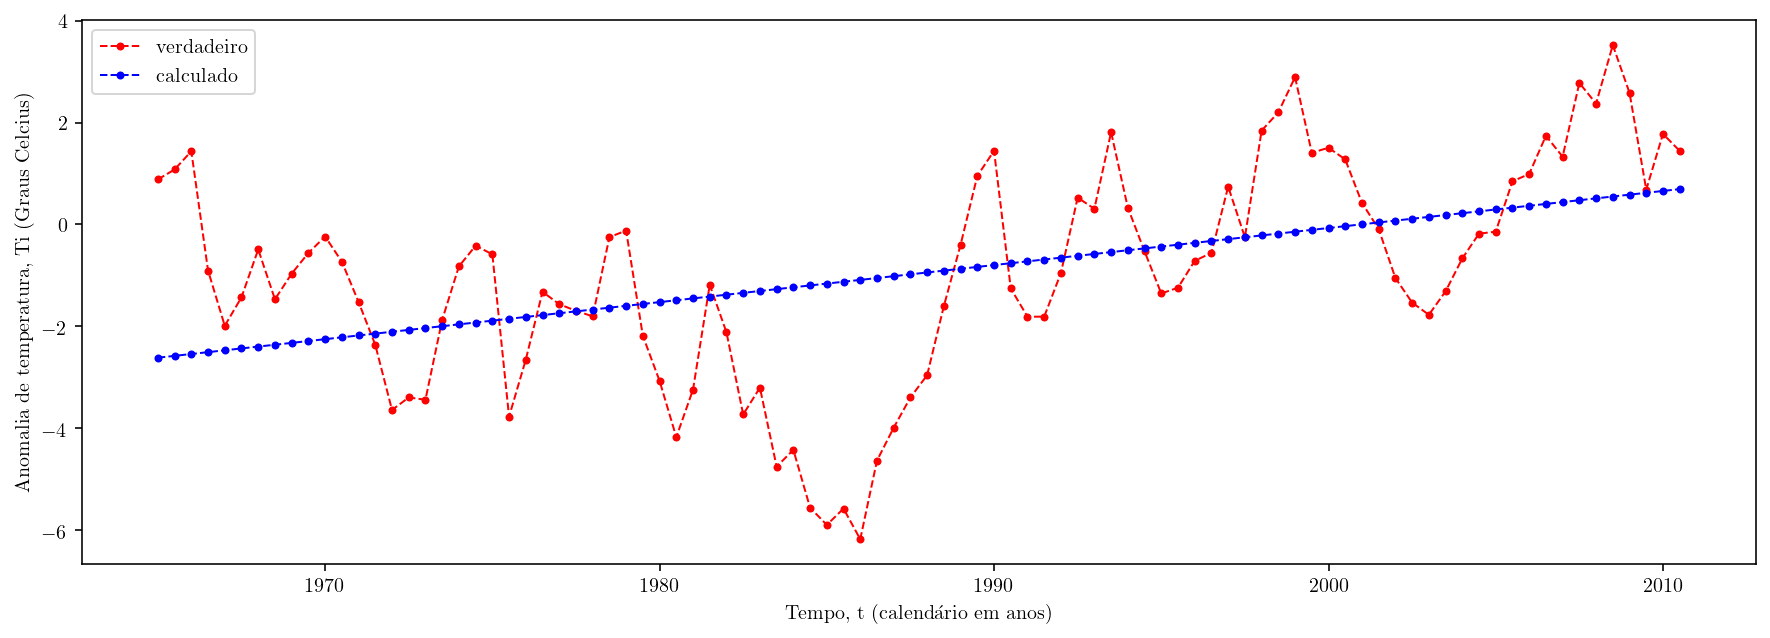

In [18]:
#dcalculado=at+b
dcalc=np.empty_like(d)
dcalc= a+b*t
#print(dcalc,np.size(dcalc))



plt.plot(t,d,color='red', marker='o', linestyle='dashed', linewidth=1, markersize=3, label='verdadeiro')
plt.plot(t,dcalc,color='blue', marker='o', linestyle='dashed', linewidth=1, markersize=3,label='calculado')
plt.xlabel('Tempo, t (calendário em anos)')  
plt.ylabel('Anomalia de temperatura, Ti (Graus Celcius)')
plt.legend()


## E quando o problema é mal-posto??? O que fazer????

Um problema é considerado mal-posto quando os vetores que compõe a matriz identidade são linearmente depentes. Ou quando a diferença entre os elementos de cada linha são nulos ou próximos de zero.  Nestes casos é necessário calcular o vetor de parâmetros via regularizador. Isto é uma relação que aproximará o vetor de parâmetros **calculado** ao **verdadeiro valor** do vetor de parâmteros. Ou seja, ele nunca será o valor verdadeiro, mas a busca trata-se, agora, de achar o melhor conjunto de valor de parâmetros

### Regularizador Tikonov de ordem 0

$$ m_{calc}= [(G^{T}G)^{-1} G^{T}+ \mu \textbf{I}] d$$
